In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [3]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

In [4]:
max_length = 200
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)

In [5]:
model = tf.keras.Sequential([
    layers.Embedding(vocab_size, 64, input_length=max_length),
    layers.LSTM(64),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6611 - loss: 0.6124 - val_accuracy: 0.8452 - val_loss: 0.3687
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9011 - loss: 0.2598 - val_accuracy: 0.8586 - val_loss: 0.3191
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9310 - loss: 0.1906 - val_accuracy: 0.8780 - val_loss: 0.3363


In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'\nTest Accuracy: {accuracy:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8674 - loss: 0.3598

Test Accuracy: 0.8678


In [9]:
predictions = (model.predict(x_test[:100]) > 0.5).astype(int).flatten()
true_labels = y_test[:100]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


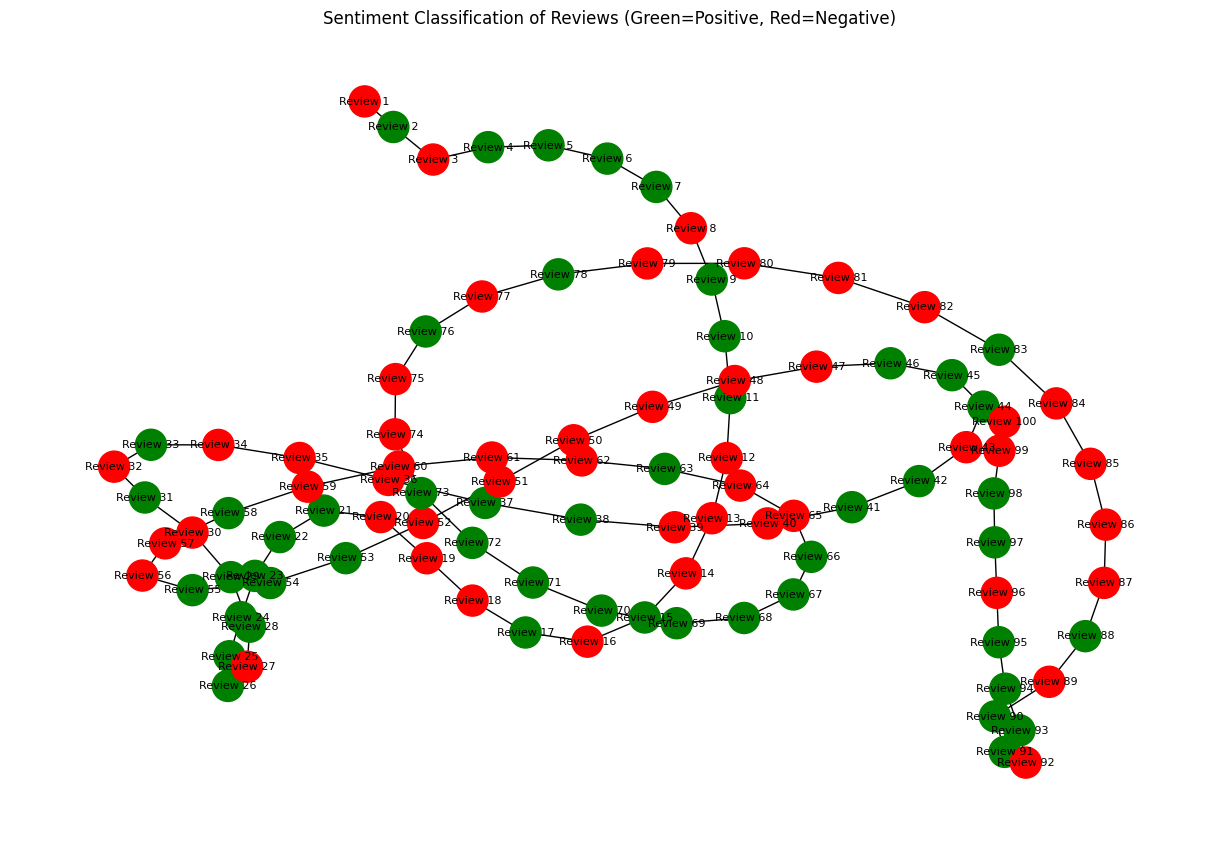

In [12]:
G = nx.Graph()

for i in range(len(predictions)):
    sentiment = "Positive" if predictions[i] == 1 else "Negative"
    color = 'green' if sentiment == "Positive" else 'red'
    G.add_node(f'Review {i+1}', sentiment=sentiment, color=color)

# Add edges randomly to simulate relationships (optional)
for i in range(len(predictions)-1):
    G.add_edge(f'Review {i+1}', f'Review {i+2}')

# Draw graph
colors = [G.nodes[node]['color'] for node in G.nodes()]
plt.figure(figsize=(12,8))
nx.draw(G, with_labels=True, node_color=colors, node_size=500, font_size=8)
plt.title('Sentiment Classification of Reviews (Green=Positive, Red=Negative)')
plt.show()